In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
rng = np.random.default_rng()

In [3]:
# how many steps
num_timesteps = 10
# how many items to track
num_targets = 3
# spatial dimensionality; keep to just 2 or 3 prob
num_dim = 2

# all points start at (x~U(-start_range, start_range), y~..., z~...)
start_range = 100

In [4]:
trajectories = []
for _ in range(num_targets):
    coords = []
    for _ in range(num_dim):
        
        start = rng.uniform(-start_range, start_range)

        delta = rng.uniform(-3, 3)

        points = np.linspace(start, delta * num_timesteps, num_timesteps)

        coords.append(points)
    trajectories.append(coords)
trajectories = np.array(trajectories)
trajectories

array([[[-91.98563646, -80.35594996, -68.72626346, -57.09657696,
         -45.46689046, -33.83720396, -22.20751746, -10.57783096,
           1.05185554,  12.68154204],
        [ 89.19945608,  82.15276668,  75.10607727,  68.05938787,
          61.01269847,  53.96600907,  46.91931967,  39.87263026,
          32.82594086,  25.77925146]],

       [[ 24.47451861,  23.3339135 ,  22.19330839,  21.05270328,
          19.91209817,  18.77149306,  17.63088795,  16.49028284,
          15.34967773,  14.20907262],
        [-54.74520384, -48.54986825, -42.35453266, -36.15919707,
         -29.96386148, -23.76852589, -17.57319031, -11.37785472,
          -5.18251913,   1.01281646]],

       [[-58.85812712, -54.6534147 , -50.44870228, -46.24398986,
         -42.03927745, -37.83456503, -33.62985261, -29.42514019,
         -25.22042777, -21.01571535],
        [-93.9814813 , -80.77008722, -67.55869315, -54.34729907,
         -41.135905  , -27.92451092, -14.71311684,  -1.50172277,
          11.70967131,  24

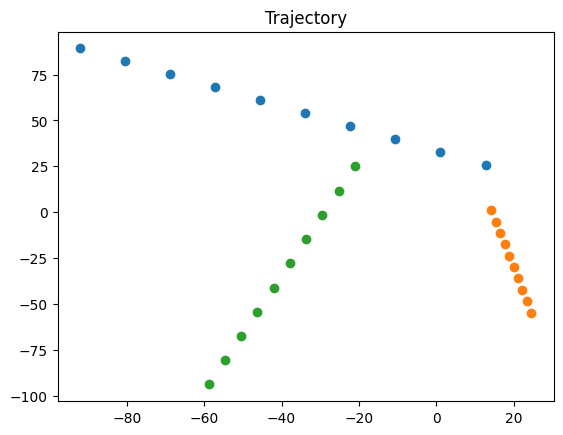

In [5]:
%matplotlib inline
fig = plt.figure()
if num_dim == 3:    
    ax = fig.add_subplot(111, projection='3d')
else:
    ax = fig.add_subplot(111)
for coords in trajectories:
    if coords.shape[0] == 2:
        ax.scatter(coords[0,:], coords[1,:])
    else:
        ax.scatter(coords[0,:], coords[1,:], coords[2,:])
ax.title.set_text("Trajectory")

Text(0.5, 0, 'time')

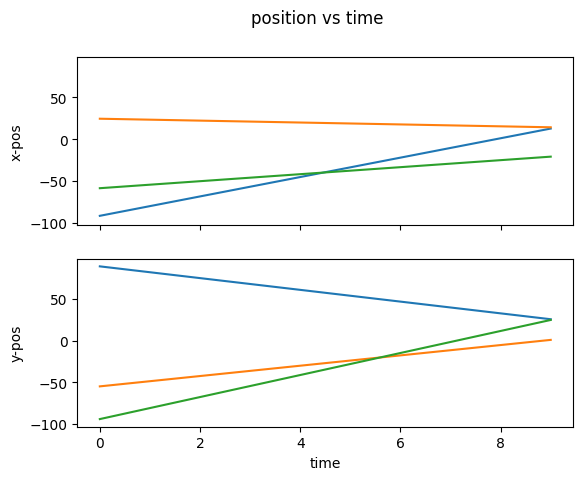

In [6]:
fig, axes = plt.subplots(num_dim, sharex=True, sharey=True)
fig.suptitle('position vs time')
for i, ax in enumerate(axes.flatten()):
    for coords in trajectories:
        ax.plot(np.arange(num_timesteps), coords[i,:])
    ax.set_ylabel(f"{chr(ord('x') + i)}-pos")
plt.xlabel('time')

In [7]:
np.save("2d_mt_trajectories.npy", trajectories)

In [8]:
np.load("2d_mt_trajectories.npy")

array([[[-91.98563646, -80.35594996, -68.72626346, -57.09657696,
         -45.46689046, -33.83720396, -22.20751746, -10.57783096,
           1.05185554,  12.68154204],
        [ 89.19945608,  82.15276668,  75.10607727,  68.05938787,
          61.01269847,  53.96600907,  46.91931967,  39.87263026,
          32.82594086,  25.77925146]],

       [[ 24.47451861,  23.3339135 ,  22.19330839,  21.05270328,
          19.91209817,  18.77149306,  17.63088795,  16.49028284,
          15.34967773,  14.20907262],
        [-54.74520384, -48.54986825, -42.35453266, -36.15919707,
         -29.96386148, -23.76852589, -17.57319031, -11.37785472,
          -5.18251913,   1.01281646]],

       [[-58.85812712, -54.6534147 , -50.44870228, -46.24398986,
         -42.03927745, -37.83456503, -33.62985261, -29.42514019,
         -25.22042777, -21.01571535],
        [-93.9814813 , -80.77008722, -67.55869315, -54.34729907,
         -41.135905  , -27.92451092, -14.71311684,  -1.50172277,
          11.70967131,  24